In [1]:
import pandas as pd

# Create a small sample dataset
data = {
    "review": [
        "I loved this movie, it was amazing!",
        "The acting was terrible, I didn’t like it.",
        "An excellent film with a great story.",
        "Not good, the plot was boring.",
        "Wonderful direction and performance.",
        "It was just okay, not great.",
        "Worst movie ever!",
        "Fantastic! I’ll watch it again.",
        "Bad experience, waste of time.",
        "Really enjoyed the visuals and music."
    ],
    "sentiment": [1, 0, 1, 0, 1, 0, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
df.to_csv("sample_imdb.csv", index=False)
print("✅ sample_imdb.csv created successfully!")
df.head()

✅ sample_imdb.csv created successfully!


,review,sentiment
0,"I loved this movie, it was amazing!",1
1,"The acting was terrible, I didn’t like it.",0
2,An excellent film with a great story.,1
3,"Not good, the plot was boring.",0
4,Wonderful direction and performance.,1


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("sample_imdb.csv")
print(df.head())

                                       review  sentiment
0         I loved this movie, it was amazing!          1
1  The acting was terrible, I didn’t like it.          0
2       An excellent film with a great story.          1
3              Not good, the plot was boring.          0
4        Wonderful direction and performance.          1


In [15]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.3, random_state=42)

# Convert text into numerical form
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

import warnings
warnings.filterwarnings('ignore')

Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



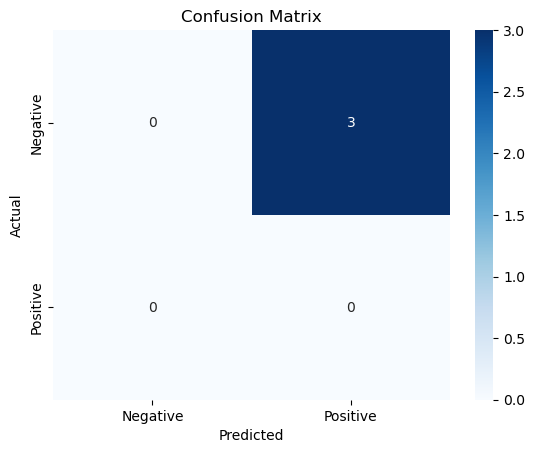

In [18]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Test with your own sentence
sample = ["This movie was super boring"]
sample_vec = vectorizer.transform(sample)
prediction = model.predict(sample_vec)
print("Sentiment:", "Positive" if prediction[0] == 1 else "Negative")

Sentiment: Negative
